## Pandas - Data Aggregation and Group Operations
 - Split, apply, and combine

<img src="http://people.bu.edu/kalathur/figs/split-apply-combine.png" width="600"/>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_rows = 10

In [3]:
np.random.seed(12345)

In [4]:
section_ids = np.repeat(['A','B','C','D'], [10,20,30,40])
print(section_ids)

['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D'
 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D'
 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D']


In [5]:
quiz1_scores = np.random.randint(50, 80, 100)
print(quiz1_scores)

[52 55 79 51 54 59 55 52 79 51 72 67 77 64 59 77 73 72 66 68 59 61 63 60
 67 68 56 57 61 57 73 79 74 73 79 51 77 73 54 50 65 53 78 78 55 65 73 61
 64 69 67 61 55 52 71 69 58 55 52 62 55 77 69 62 64 77 66 77 56 74 50 61
 55 60 62 72 62 74 59 68 68 68 75 64 76 73 71 57 67 77 50 76 62 75 64 76
 61 53 50 53]


In [6]:
quiz2_scores = np.random.randint(50, 90, 100)
print(quiz2_scores)

[50 56 52 87 58 72 71 51 82 55 70 57 55 68 58 61 68 55 87 59 88 51 75 50
 63 58 58 68 65 76 82 82 72 55 69 65 84 78 57 54 89 53 72 82 63 70 51 75
 55 52 69 74 85 55 74 64 69 74 80 62 61 86 75 75 82 83 78 56 82 63 87 73
 62 68 79 51 75 50 76 62 76 73 81 63 55 50 60 81 52 69 65 84 67 62 64 50
 77 89 53 67]


In [7]:
section_data = pd.DataFrame({'Section': section_ids, 
                             'Quiz1': quiz1_scores,
                             'Quiz2': quiz2_scores
                            })
section_data.head()

,Section,Quiz1,Quiz2
0,A,52,50
1,A,55,56
2,A,79,52
3,A,51,87
4,A,54,58


In [8]:
section_data.tail()

,Section,Quiz1,Quiz2
95,D,76,50
96,D,61,77
97,D,53,89
98,D,50,53
99,D,53,67


In [9]:
section_data.groupby('Section')

In [10]:
section_data.groupby('Section').size()

Section
A    10
B    20
C    30
D    40
dtype: int64

In [11]:
for (section, group) in section_data.groupby('Section'):
    print("Section={0:5s} Shape={1}, Type={2}".format(section, group.shape, type(group)))
    print(group)
    print()

Section=A     Shape=(10, 3), Type=<class 'pandas.core.frame.DataFrame'>
  Section  Quiz1  Quiz2
0       A     52     50
1       A     55     56
2       A     79     52
3       A     51     87
4       A     54     58
5       A     59     72
6       A     55     71
7       A     52     51
8       A     79     82
9       A     51     55

Section=B     Shape=(20, 3), Type=<class 'pandas.core.frame.DataFrame'>
   Section  Quiz1  Quiz2
10       B     72     70
11       B     67     57
12       B     77     55
13       B     64     68
14       B     59     58
..     ...    ...    ...
25       B     68     58
26       B     56     58
27       B     57     68
28       B     61     65
29       B     57     76

[20 rows x 3 columns]

Section=C     Shape=(30, 3), Type=<class 'pandas.core.frame.DataFrame'>
   Section  Quiz1  Quiz2
30       C     73     82
31       C     79     82
32       C     74     72
33       C     73     55
34       C     79     69
..     ...    ...    ...
55       C     69   

In [12]:
section_data.describe().round(2)

,Quiz1,Quiz2
count,100.00,100.00
mean,64.53,67.52
std,8.94,11.58
min,50.00,50.00
25%,56.75,57.00
50%,64.00,68.00
75%,73.00,76.00
max,79.00,89.00


In [13]:
type(section_data.describe())

pandas.core.frame.DataFrame

In [14]:
section_data.describe().unstack().round(2)

Quiz1  count    100.00
       mean      64.53
       std        8.94
       min       50.00
       25%       56.75
                 ...  
Quiz2  min       50.00
       25%       57.00
       50%       68.00
       75%       76.00
       max       89.00
Length: 16, dtype: float64

In [15]:
type(section_data.describe().unstack())

pandas.core.series.Series

In [16]:
section_data.groupby('Section').mean().round(2)

,Quiz1,Quiz2
Section,,
A,58.70,63.40
B,65.20,64.50
C,64.87,68.87
D,65.40,69.05


In [17]:
section_data.groupby('Section').Quiz1.mean().round(2)

Section
A    58.70
B    65.20
C    64.87
D    65.40
Name: Quiz1, dtype: float64

In [18]:
section_data.groupby('Section')['Quiz1'].mean().round(2)

Section
A    58.70
B    65.20
C    64.87
D    65.40
Name: Quiz1, dtype: float64

In [19]:
section_data.groupby('Section').max()

,Quiz1,Quiz2
Section,,
A,79,87
B,77,88
C,79,89
D,77,89


In [20]:
section_data.groupby('Section').min()

,Quiz1,Quiz2
Section,,
A,51,50
B,56,50
C,50,51
D,50,50


In [21]:
section_data.groupby('Section').count() # how many datapoints in each section

,Quiz1,Quiz2
Section,,
A,10,10
B,20,20
C,30,30
D,40,40


In [22]:
section_data.groupby('Section').size()

Section
A    10
B    20
C    30
D    40
dtype: int64

In [23]:
section_data.groupby('Section').first()

,Quiz1,Quiz2
Section,,
A,52,50
B,72,70
C,73,82
D,55,61


In [24]:
section_data.groupby('Section').last()

,Quiz1,Quiz2
Section,,
A,51,55
B,57,76
C,62,62
D,53,67


In [25]:
section_data.groupby('Section').nth(1)

,Quiz1,Quiz2
Section,,
A,55,56
B,67,57
C,79,82
D,77,86


In [26]:
section_data.groupby('Section')['Quiz1'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Section,,,,,,,,
A,10.0,58.70,10.97,51.0,52.00,54.5,58.0,79.0
B,20.0,65.20,6.57,56.0,59.75,65.0,69.0,77.0
C,30.0,64.87,9.64,50.0,55.00,65.0,73.0,79.0
D,40.0,65.40,8.67,50.0,59.75,65.0,74.0,77.0


AGGREGATE - FILTER - TRANSFORM

If you want to get a single value for each group, use aggregate() (or one of its shortcuts).

If you want to get a subset of the original rows, use filter().

If you want to get a new value for each original row, use transform().

In [27]:



section_data.groupby('Section').aggregate(                   # Aggregate over a list of fucntions
    ['count', 'min', 'max', 'mean', 'median']).round(2)

Quiz1                       Quiz2                      
        count min max   mean median count min max   mean median
Section                                                        
A          10  51  79  58.70   54.5    10  50  87  63.40   57.0
B          20  56  77  65.20   65.0    20  50  88  64.50   62.0
C          30  50  79  64.87   65.0    30  51  89  68.87   69.5
D          40  50  77  65.40   65.0    40  50  89  69.05   68.5

In [28]:
section_data.groupby('Section').aggregate(
    [np.size, np.min, np.max, np.mean, np.median]).round(2)

Quiz1                         Quiz2                        
         size amin amax   mean median  size amin amax   mean median
Section                                                            
A          10   51   79  58.70   54.5    10   50   87  63.40   57.0
B          20   56   77  65.20   65.0    20   50   88  64.50   62.0
C          30   50   79  64.87   65.0    30   51   89  68.87   69.5
D          40   50   77  65.40   65.0    40   50   89  69.05   68.5

In [29]:
section_data.groupby('Section')['Quiz1'].aggregate(
    ['count', 'mean', 'median']).round(2)

,count,mean,median
Section,,,
A,10,58.70,54.5
B,20,65.20,65.0
C,30,64.87,65.0
D,40,65.40,65.0


In [30]:
data = section_data.groupby('Section').aggregate(
    ['count', 'mean', 'median']).round(2)

data

Quiz1               Quiz2              
        count   mean median count   mean median
Section                                        
A          10  58.70   54.5    10  63.40   57.0
B          20  65.20   65.0    20  64.50   62.0
C          30  64.87   65.0    30  68.87   69.5
D          40  65.40   65.0    40  69.05   68.5

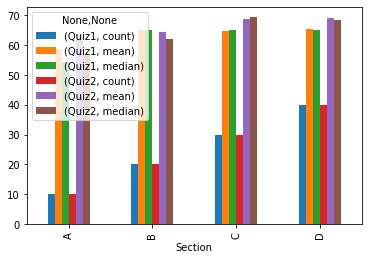

In [31]:
data.plot(kind='bar');

In [32]:
data_u = data.unstack()

In [33]:
data_u

               Section
Quiz1  count   A          10.00
               B          20.00
               C          30.00
               D          40.00
       mean    A          58.70
                          ...  
Quiz2  mean    D          69.05
       median  A          57.00
               B          62.00
               C          69.50
               D          68.50
Length: 24, dtype: float64

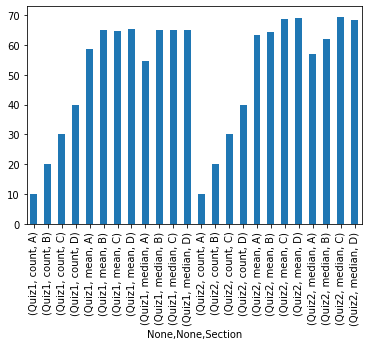

In [34]:
data_u.plot(kind='bar');

#### student's gender data for 4 sections

In [35]:
a = np.tile(['F', 'M'], 4)
a

array(['F', 'M', 'F', 'M', 'F', 'M', 'F', 'M'], dtype='<U1')

In [36]:
# Female and male students for 4 sections

b = np.repeat(a, [10, 0, 5, 15, 20, 10, 15, 25])
b

array(['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M'], dtype='<U1')

In [37]:
gender_data = pd.DataFrame({'Section': section_ids, 
                             'Gender' : b,
                             'Quiz1': quiz1_scores,
                             'Quiz2': quiz2_scores
                            })
gender_data

,Section,Gender,Quiz1,Quiz2
0,A,F,52,50
1,A,F,55,56
2,A,F,79,52
3,A,F,51,87
4,A,F,54,58
...,...,...,...,...
95,D,M,76,50
96,D,M,61,77
97,D,M,53,89
98,D,M,50,53


In [38]:
grouped_data = gender_data.groupby(['Section', 'Gender'])

grouped_data.size()

Section  Gender
A        F         10
B        F          5
         M         15
C        F         20
         M         10
D        F         15
         M         25
dtype: int64

In [39]:
grouped_data.describe().round(2)

Quiz1                                              Quiz2  \
               count   mean    std   min   25%   50%    75%   max count   
Section Gender                                                            
A       F       10.0  58.70  10.97  51.0  52.0  54.5  58.00  79.0  10.0   
B       F        5.0  67.80   6.98  59.0  64.0  67.0  72.00  77.0   5.0   
        M       15.0  64.33   6.43  56.0  59.5  63.0  68.00  77.0  15.0   
C       F       20.0  67.20  10.09  50.0  59.5  71.0  74.75  79.0  20.0   
        M       10.0  60.20   6.97  52.0  55.0  59.5  65.75  71.0  10.0   
D       F       15.0  64.33   8.82  50.0  58.0  62.0  71.50  77.0  15.0   
        M       25.0  66.04   8.70  50.0  61.0  68.0  74.00  77.0  25.0   

                                                              
                 mean    std   min    25%   50%    75%   max  
Section Gender                                                
A       F       63.40  13.55  50.0  52.75  57.0  71.75  87.0  
B       F       61.60   6.88  55.0  57.00  58.0  68.00  70.0  
        M       65.47  11.72  50.0  58.00  63.0  71.50  88.0  
C       F       68.00  12.42  51.0  55.00  69.5  79.00  89.0  
        M       70.60   8.80  55.0  65.25  71.5  74.00  85.0  
D       F       74.00   9.86  56.0  65.50  75.0  82.00  87.0  
        M       66.08  11.77  50.0  55.00  65.0  76.00  89.0

In [40]:
grouped_data.agg(
    ['count', 'min', 'max', 'mean', 'median']).round(2)

Quiz1                       Quiz2                      
               count min max   mean median count min max   mean median
Section Gender                                                        
A       F         10  51  79  58.70   54.5    10  50  87  63.40   57.0
B       F          5  59  77  67.80   67.0     5  55  70  61.60   58.0
        M         15  56  77  64.33   63.0    15  50  88  65.47   63.0
C       F         20  50  79  67.20   71.0    20  51  89  68.00   69.5
        M         10  52  71  60.20   59.5    10  55  85  70.60   71.5
D       F         15  50  77  64.33   62.0    15  56  87  74.00   75.0
        M         25  50  77  66.04   68.0    25  50  89  66.08   65.0

In [41]:
data = grouped_data.aggregate(['min','mean','max']).round(2)
data

Quiz1            Quiz2           
                 min   mean max   min   mean max
Section Gender                                  
A       F         51  58.70  79    50  63.40  87
B       F         59  67.80  77    55  61.60  70
        M         56  64.33  77    50  65.47  88
C       F         50  67.20  79    51  68.00  89
        M         52  60.20  71    55  70.60  85
D       F         50  64.33  77    56  74.00  87
        M         50  66.04  77    50  66.08  89

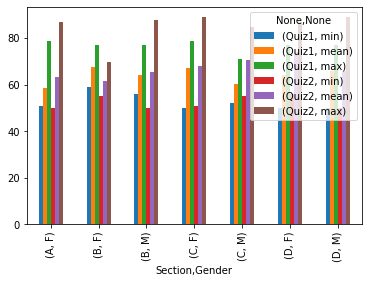

In [42]:
data.plot(kind='bar');

In [43]:
data.index

MultiIndex([('A', 'F'),
            ('B', 'F'),
            ('B', 'M'),
            ('C', 'F'),
            ('C', 'M'),
            ('D', 'F'),
            ('D', 'M')],
           names=['Section', 'Gender'])

In [44]:
data.columns

MultiIndex([('Quiz1',  'min'),
            ('Quiz1', 'mean'),
            ('Quiz1',  'max'),
            ('Quiz2',  'min'),
            ('Quiz2', 'mean'),
            ('Quiz2',  'max')],
           )

In [45]:
data.xs('F', level='Gender')

Quiz1            Quiz2          
          min   mean max   min  mean max
Section                                 
A          51  58.70  79    50  63.4  87
B          59  67.80  77    55  61.6  70
C          50  67.20  79    51  68.0  89
D          50  64.33  77    56  74.0  87

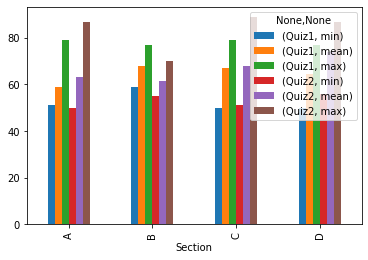

In [46]:
data.xs('F', level='Gender').plot(kind='bar');

In [47]:
idx = pd.IndexSlice  # *************************

In [48]:
data.loc[idx[:,'F'],idx[:,['min','max']]]  # Cross section of only females and only min/max

Quiz1     Quiz2    
                 min max   min max
Section Gender                    
A       F         51  79    50  87
B       F         59  77    55  70
C       F         50  79    51  89
D       F         50  77    56  87

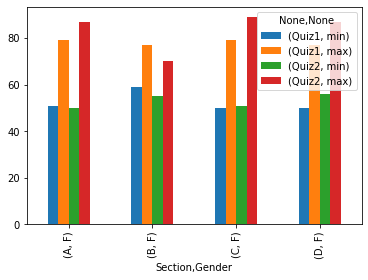

In [49]:
data.loc[idx[:,'F'],idx[:,['min','max']]].plot(kind='bar');

In [50]:
data

Quiz1            Quiz2           
                 min   mean max   min   mean max
Section Gender                                  
A       F         51  58.70  79    50  63.40  87
B       F         59  67.80  77    55  61.60  70
        M         56  64.33  77    50  65.47  88
C       F         50  67.20  79    51  68.00  89
        M         52  60.20  71    55  70.60  85
D       F         50  64.33  77    56  74.00  87
        M         50  66.04  77    50  66.08  89

In [51]:
data_u = data.unstack()
data_u

Quiz1                                 Quiz2                           \
          min         mean          max         min        mean          max   
Gender      F     M      F      M     F     M     F     M     F      M     F   
Section                                                                        
A        51.0   NaN  58.70    NaN  79.0   NaN  50.0   NaN  63.4    NaN  87.0   
B        59.0  56.0  67.80  64.33  77.0  77.0  55.0  50.0  61.6  65.47  70.0   
C        50.0  52.0  67.20  60.20  79.0  71.0  51.0  55.0  68.0  70.60  89.0   
D        50.0  50.0  64.33  66.04  77.0  77.0  56.0  50.0  74.0  66.08  87.0   

               
               
Gender      M  
Section        
A         NaN  
B        88.0  
C        85.0  
D        89.0

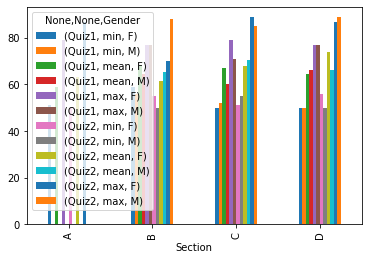

In [52]:
data_u.plot(kind='bar');

In [53]:
data_u.columns

MultiIndex([('Quiz1',  'min', 'F'),
            ('Quiz1',  'min', 'M'),
            ('Quiz1', 'mean', 'F'),
            ('Quiz1', 'mean', 'M'),
            ('Quiz1',  'max', 'F'),
            ('Quiz1',  'max', 'M'),
            ('Quiz2',  'min', 'F'),
            ('Quiz2',  'min', 'M'),
            ('Quiz2', 'mean', 'F'),
            ('Quiz2', 'mean', 'M'),
            ('Quiz2',  'max', 'F'),
            ('Quiz2',  'max', 'M')],
           names=[None, None, 'Gender'])

In [54]:
data_u.loc[:, idx[:,['min','max'],'F']]

Quiz1       Quiz2      
          min   max   min   max
Gender      F     F     F     F
Section                        
A        51.0  79.0  50.0  87.0
B        59.0  77.0  55.0  70.0
C        50.0  79.0  51.0  89.0
D        50.0  77.0  56.0  87.0

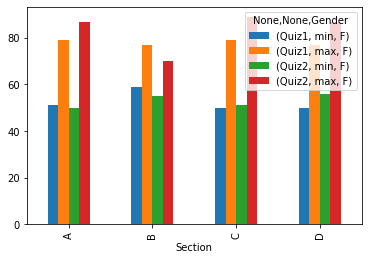

In [55]:
data_u.loc[:, idx[:,['min','max'],'F']].plot(kind='bar');

### Selecting a Group

In [56]:
gender_data

,Section,Gender,Quiz1,Quiz2
0,A,F,52,50
1,A,F,55,56
2,A,F,79,52
3,A,F,51,87
4,A,F,54,58
...,...,...,...,...
95,D,M,76,50
96,D,M,61,77
97,D,M,53,89
98,D,M,50,53


In [57]:
grouped_data = gender_data.groupby(['Section', 'Gender'])  # specified as list
grouped_data

In [58]:
 grouped_data.get_group(('B','F'))  # specified as tuple

,Section,Gender,Quiz1,Quiz2
10,B,F,72,70
11,B,F,67,57
12,B,F,77,55
13,B,F,64,68
14,B,F,59,58


In [59]:
grouped_data['Quiz1']

In [60]:
grouped_data['Quiz1'].describe()

count       mean        std   min   25%   50%    75%   max
Section Gender                                                            
A       F        10.0  58.700000  10.965096  51.0  52.0  54.5  58.00  79.0
B       F         5.0  67.800000   6.978539  59.0  64.0  67.0  72.00  77.0
        M        15.0  64.333333   6.432803  56.0  59.5  63.0  68.00  77.0
C       F        20.0  67.200000  10.086990  50.0  59.5  71.0  74.75  79.0
        M        10.0  60.200000   6.972964  52.0  55.0  59.5  65.75  71.0
D       F        15.0  64.333333   8.820971  50.0  58.0  62.0  71.50  77.0
        M        25.0  66.040000   8.696168  50.0  61.0  68.0  74.00  77.0

### Grouping with Index levels and columns

In [61]:
np.random.seed(123)
data = [['Alice', 'Alice', 'Bob', 'Bob', 'Charlie', 'Charlie', 'Dave', 'Dave'],
        ['cs1', 'cs2', 'cs1', 'cs2', 'cs1', 'cs2', 'cs1', 'cs2']]

df = pd.DataFrame(np.random.randint(60,80,(8, 4)), index = data,
                 columns = ['Quiz1', 'Quiz2', 'Quiz3', 'Quiz4'])
df.index.names = ['Student', 'Class']

df

Quiz1  Quiz2  Quiz3  Quiz4
Student Class                            
Alice   cs1       73     62     62     66
        cs2       77     79     70     61
Bob     cs1       60     77     75     69
        cs2       60     74     60     75
Charlie cs1       79     74     64     60
        cs2       76     64     77     63
Dave    cs1       62     67     62     75
        cs2       76     67     69     63

In [62]:
print(df.groupby([pd.Grouper(level=1), 'Quiz1']).mean())  # Note: name of student disappears

             Quiz2  Quiz3  Quiz4
Class Quiz1                     
cs1   60      77.0   75.0   69.0
      62      67.0   62.0   75.0
      73      62.0   62.0   66.0
      79      74.0   64.0   60.0
cs2   60      74.0   60.0   75.0
      76      65.5   73.0   63.0
      77      79.0   70.0   61.0


In [63]:
print(df.groupby([pd.Grouper(level='Class'), 'Quiz2']).mean())

             Quiz1  Quiz3  Quiz4
Class Quiz2                     
cs1   62        73     62     66
      67        62     62     75
      74        79     64     60
      77        60     75     69
cs2   64        76     77     63
      67        76     69     63
      74        60     60     75
      79        77     70     61


In [64]:
print(df.groupby(['Class', 'Quiz2']).mean())  # Shortcut indexed by list

             Quiz1  Quiz3  Quiz4
Class Quiz2                     
cs1   62        73     62     66
      67        62     62     75
      74        79     64     60
      77        60     75     69
cs2   64        76     77     63
      67        76     69     63
      74        60     60     75
      79        77     70     61


### Filtering
 - The argument to filter() must be a function or lambda that will take a group and return True or False to determine whether rows belonging to that group should be included in the output

In [65]:
gender_data.groupby(['Section', 'Gender']).size()

Section  Gender
A        F         10
B        F          5
         M         15
C        F         20
         M         10
D        F         15
         M         25
dtype: int64

In [66]:
df1 = gender_data.groupby('Section').filter(
    lambda x: (x['Gender'] == 'F').sum() > 10)
df1

,Section,Gender,Quiz1,Quiz2
30,C,F,73,82
31,C,F,79,82
32,C,F,74,72
33,C,F,73,55
34,C,F,79,69
...,...,...,...,...
95,D,M,76,50
96,D,M,61,77
97,D,M,53,89
98,D,M,50,53


In [67]:
df1.groupby(['Section', 'Gender']).size()

Section  Gender
C        F         20
         M         10
D        F         15
         M         25
dtype: int64

In [68]:
gender_data.groupby(['Section', 'Gender']).mean().round(2)

Quiz1  Quiz2
Section Gender              
A       F       58.70  63.40
B       F       67.80  61.60
        M       64.33  65.47
C       F       67.20  68.00
        M       60.20  70.60
D       F       64.33  74.00
        M       66.04  66.08

In [69]:
df2 = gender_data.groupby(['Section', 'Gender']).filter(
    lambda x: x['Quiz2'].mean() > 70)
df2

,Section,Gender,Quiz1,Quiz2
50,C,M,67,69
51,C,M,61,74
52,C,M,55,85
53,C,M,52,55
54,C,M,71,74
...,...,...,...,...
70,D,F,50,87
71,D,F,61,73
72,D,F,55,62
73,D,F,60,68


In [70]:
df2.groupby(['Section', 'Gender']).size()

Section  Gender
C        M         10
D        F         15
dtype: int64

### Transformation


In [71]:
gender_data

,Section,Gender,Quiz1,Quiz2
0,A,F,52,50
1,A,F,55,56
2,A,F,79,52
3,A,F,51,87
4,A,F,54,58
...,...,...,...,...
95,D,M,76,50
96,D,M,61,77
97,D,M,53,89
98,D,M,50,53


In [72]:
gender_data.groupby('Section').describe().round(2)

Quiz1                                              Quiz2         \
        count   mean    std   min    25%   50%   75%   max count   mean   
Section                                                                   
A        10.0  58.70  10.97  51.0  52.00  54.5  58.0  79.0  10.0  63.40   
B        20.0  65.20   6.57  56.0  59.75  65.0  69.0  77.0  20.0  64.50   
C        30.0  64.87   9.64  50.0  55.00  65.0  73.0  79.0  30.0  68.87   
D        40.0  65.40   8.67  50.0  59.75  65.0  74.0  77.0  40.0  69.05   

                                                
           std   min    25%   50%    75%   max  
Section                                         
A        13.55  50.0  52.75  57.0  71.75  87.0  
B        10.68  50.0  57.75  62.0  68.50  88.0  
C        11.25  51.0  58.25  69.5  77.25  89.0  
D        11.63  50.0  61.75  68.5  78.25  89.0

In [73]:
def foo(x):
    return (x - x.mean())

df3 = gender_data.groupby('Section').transform(foo)
df3

,Quiz1,Quiz2
0,-6.7,-13.40
1,-3.7,-7.40
2,20.3,-11.40
3,-7.7,23.60
4,-4.7,-5.40
...,...,...
95,10.6,-19.05
96,-4.4,7.95
97,-12.4,19.95
98,-15.4,-16.05


In [74]:
gender_data.groupby('Section').transform(
    lambda x: x - x.mean()
)

,Quiz1,Quiz2
0,-6.7,-13.40
1,-3.7,-7.40
2,20.3,-11.40
3,-7.7,23.60
4,-4.7,-5.40
...,...,...
95,10.6,-19.05
96,-4.4,7.95
97,-12.4,19.95
98,-15.4,-16.05


### apply

In [75]:
def diff_from_mean(x):
    # x is a DataFrame of group values
    x['Quiz1'] = (x['Quiz1'] - np.mean(x['Quiz1']))
    x['Quiz2'] = (x['Quiz2'] - np.mean(x['Quiz2']))
    return x

In [76]:
df4 = gender_data.groupby('Section').apply(diff_from_mean)
df4

,Section,Gender,Quiz1,Quiz2
0,A,F,-6.7,-13.40
1,A,F,-3.7,-7.40
2,A,F,20.3,-11.40
3,A,F,-7.7,23.60
4,A,F,-4.7,-5.40
...,...,...,...,...
95,D,M,10.6,-19.05
96,D,M,-4.4,7.95
97,D,M,-12.4,19.95
98,D,M,-15.4,-16.05


In [77]:
np.allclose(df3['Quiz1'], df4['Quiz1'])

True

In [78]:
df4.groupby('Section').agg(np.sum).round(2)

,Quiz1,Quiz2
Section,,
A,-0.0,0.0
B,-0.0,0.0
C,0.0,0.0
D,-0.0,0.0


In [79]:
np.allclose(df4.groupby('Section').agg(np.sum), 0)

True

## Tips Dataset

In [80]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [81]:
tips.groupby('day').size()

day
Thur    62
Fri     19
Sat     87
Sun     76
dtype: int64

In [82]:
# Average total bill by day

tips.groupby('day')['total_bill'].aggregate('mean').round(2)

day
Thur    17.68
Fri     17.15
Sat     20.44
Sun     21.41
Name: total_bill, dtype: float64

In [83]:
tips.groupby('day')['total_bill'].mean().round(2)

day
Thur    17.68
Fri     17.15
Sat     20.44
Sun     21.41
Name: total_bill, dtype: float64

In [84]:
tips1 = tips.groupby('day').filter(
    lambda x : x['total_bill'].mean() > 20)

In [85]:
tips1.groupby('day').size()

day
Thur     0
Fri      0
Sat     87
Sun     76
dtype: int64

In [86]:
tips1['size'].mean().round(2)

2.67

In [87]:
tips1.groupby('day')['size'].mean().round(2)

day
Thur     NaN
Fri      NaN
Sat     2.52
Sun     2.84
Name: size, dtype: float64

In [88]:
tips2 = tips.groupby('day').filter(
    lambda x : x['total_bill'].mean() <= 20)

In [89]:
tips2.groupby('day').size()

day
Thur    62
Fri     19
Sat      0
Sun      0
dtype: int64

In [90]:
tips2['size'].mean()

2.3703703703703702

In [91]:
tips2.groupby('day')['size'].mean().round(2)

day
Thur    2.45
Fri     2.11
Sat      NaN
Sun      NaN
Name: size, dtype: float64

In [92]:
tips.groupby('day')['total_bill'].transform(
    lambda x : x.mean().round(2)
).value_counts()

20.44    87
21.41    76
17.68    62
17.15    19
Name: total_bill, dtype: int64

In [93]:
tips['scaled_bill'] = tips.groupby('day')['total_bill'].transform(
    lambda x : (x/x.mean()).round(2)
)
tips

,total_bill,tip,sex,smoker,day,time,size,scaled_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.79
1,10.34,1.66,Male,No,Sun,Dinner,3,0.48
2,21.01,3.50,Male,No,Sun,Dinner,3,0.98
3,23.68,3.31,Male,No,Sun,Dinner,2,1.11
4,24.59,3.61,Female,No,Sun,Dinner,4,1.15
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.42
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1.33
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1.11
242,17.82,1.75,Male,No,Sat,Dinner,2,0.87


In [94]:
# Normalize the data -0.5 means x is lower than the mean by half of the standard deviation
tips['scaled_bill'] = tips.groupby('day')['total_bill'].transform(
    lambda x : ((x - x.mean())/x.std()).round(2)
)
tips

,total_bill,tip,sex,smoker,day,time,size,scaled_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.50
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.25
2,21.01,3.50,Male,No,Sun,Dinner,3,-0.05
3,23.68,3.31,Male,No,Sun,Dinner,2,0.26
4,24.59,3.61,Female,No,Sun,Dinner,4,0.36
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.91
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.71
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.24
242,17.82,1.75,Male,No,Sat,Dinner,2,-0.28


In [95]:
for day, group in tips.groupby('day'):
    print('\nDay is ' + str(day))
    print(group[['total_bill', 'day', 'scaled_bill']])


Day is Thur
     total_bill   day  scaled_bill
77        27.20  Thur         1.21
78        22.76  Thur         0.64
79        17.29  Thur        -0.05
80        19.44  Thur         0.22
81        16.66  Thur        -0.13
..          ...   ...          ...
202       13.00  Thur        -0.59
203       16.40  Thur        -0.16
204       20.53  Thur         0.36
205       16.47  Thur        -0.15
243       18.78  Thur         0.14

[62 rows x 3 columns]

Day is Fri
     total_bill  day  scaled_bill
90        28.97  Fri         1.42
91        22.49  Fri         0.64
92         5.75  Fri        -1.37
93        16.32  Fri        -0.10
94        22.75  Fri         0.67
..          ...  ...          ...
222        8.58  Fri        -1.03
223       15.98  Fri        -0.14
224       13.42  Fri        -0.45
225       16.27  Fri        -0.11
226       10.09  Fri        -0.85

[19 rows x 3 columns]

Day is Sat
     total_bill  day  scaled_bill
19        20.65  Sat         0.02
20        17.92  Sat 

,total_bill,tip,sex,smoker,time,size,scaled_bill
day,,,,,,,
Thur,18.28,4.00,Male,No,Lunch,2,0.08
Fri,11.35,2.50,Female,Yes,Dinner,2,-0.70
Sat,19.65,3.00,Female,No,Dinner,2,-0.08
Sun,10.27,1.71,Male,No,Dinner,2,-1.26


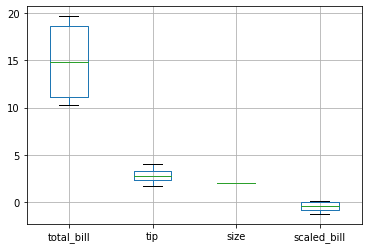

In [96]:
tips.groupby('day').nth(10).boxplot();
tips.groupby('day').nth(10)

In [97]:
tips.groupby('day').first()

,total_bill,tip,sex,smoker,time,size,scaled_bill
day,,,,,,,
Thur,27.20,4.00,Male,No,Lunch,4,1.21
Fri,28.97,3.00,Male,Yes,Dinner,2,1.42
Sat,20.65,3.35,Male,No,Dinner,3,0.02
Sun,16.99,1.01,Female,No,Dinner,2,-0.50


In [98]:
tips['tip_pct'] = (100* tips['tip'] / tips['total_bill']).round(2)
tips

,total_bill,tip,sex,smoker,day,time,size,scaled_bill,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.50,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.25,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,-0.05,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,0.26,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,0.36,14.68
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.91,20.39
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.71,7.36
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.24,8.82
242,17.82,1.75,Male,No,Sat,Dinner,2,-0.28,9.82


In [99]:
tips.groupby(['day', 'sex'])['total_bill', 'tip_pct'].mean()

total_bill    tip_pct
day  sex                          
Thur Male     18.714667  16.527000
     Female   16.715312  15.750938
Fri  Male     19.857000  14.338000
     Female   14.145556  19.940000
Sat  Male     20.802542  15.157288
     Female   19.680357  15.646071
Sun  Male     21.887241  16.234310
     Female   19.872222  18.156667

In [100]:
# Returning data withour row indices

tips.groupby(['day', 'sex'], as_index=False)['total_bill', 'tip_pct'].mean()  # remove the top row index

,day,sex,total_bill,tip_pct
0,Thur,Male,18.714667,16.527000
1,Thur,Female,16.715312,15.750938
2,Fri,Male,19.857000,14.338000
3,Fri,Female,14.145556,19.940000
4,Sat,Male,20.802542,15.157288
5,Sat,Female,19.680357,15.646071
6,Sun,Male,21.887241,16.234310
7,Sun,Female,19.872222,18.156667


In [101]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column, ascending=False)[:n]

In [102]:
top(tips)

,total_bill,tip,sex,smoker,day,time,size,scaled_bill,tip_pct
172,7.25,5.15,Male,Yes,Sun,Dinner,2,-1.60,71.03
178,9.60,4.00,Female,Yes,Sun,Dinner,2,-1.34,41.67
67,3.07,1.00,Female,Yes,Sat,Dinner,1,-1.83,32.57
232,11.61,3.39,Male,No,Sat,Dinner,2,-0.93,29.20
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.20,28.05


In [103]:
tips.groupby('day').apply(top)

total_bill   tip     sex smoker   day    time  size  scaled_bill  \
day                                                                          
Thur 149        7.51  2.00    Male     No  Thur   Lunch     2        -1.29   
     194       16.58  4.00    Male    Yes  Thur   Lunch     2        -0.14   
     88        24.71  5.85    Male     No  Thur   Lunch     2         0.89   
     87        18.28  4.00    Male     No  Thur   Lunch     2         0.08   
     200       18.71  4.00    Male    Yes  Thur   Lunch     3         0.13   
...              ...   ...     ...    ...   ...     ...   ...          ...   
Sun  172        7.25  5.15    Male    Yes   Sun  Dinner     2        -1.60   
     178        9.60  4.00  Female    Yes   Sun  Dinner     2        -1.34   
     183       23.17  6.50    Male    Yes   Sun  Dinner     4         0.20   
     51        10.29  2.60  Female     No   Sun  Dinner     2        -1.26   
     181       23.33  5.65    Male    Yes   Sun  Dinner     2         0.22   

          tip_pct  
day                
Thur 149    26.63  
     194    24.13  
     88     23.67  
     87     21.88  
     200    21.38  
...           ...  
Sun  172    71.03  
     178    41.67  
     183    28.05  
     51     25.27  
     181    24.22  

[20 rows x 9 columns]

In [104]:
tips.groupby('day').apply(top, n=2)

total_bill   tip     sex smoker   day    time  size  scaled_bill  \
day                                                                          
Thur 149        7.51  2.00    Male     No  Thur   Lunch     2        -1.29   
     194       16.58  4.00    Male    Yes  Thur   Lunch     2        -0.14   
Fri  93        16.32  4.30  Female    Yes   Fri  Dinner     2        -0.10   
     221       13.42  3.48  Female    Yes   Fri   Lunch     2        -0.45   
Sat  67         3.07  1.00  Female    Yes   Sat  Dinner     1        -1.83   
     232       11.61  3.39    Male     No   Sat  Dinner     2        -0.93   
Sun  172        7.25  5.15    Male    Yes   Sun  Dinner     2        -1.60   
     178        9.60  4.00  Female    Yes   Sun  Dinner     2        -1.34   

          tip_pct  
day                
Thur 149    26.63  
     194    24.13  
Fri  93     26.35  
     221    25.93  
Sat  67     32.57  
     232    29.20  
Sun  172    71.03  
     178    41.67

In [105]:
tips.groupby('day').apply(top, n=2, column='total_bill')

total_bill    tip     sex smoker   day    time  size  scaled_bill  \
day                                                                           
Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4         3.22   
     142       41.19   5.00    Male     No  Thur   Lunch     5         2.98   
Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4         2.77   
     90        28.97   3.00    Male    Yes   Fri  Dinner     2         1.42   
Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3         3.20   
     212       48.33   9.00    Male     No   Sat  Dinner     4         2.94   
Sun  156       48.17   5.00    Male     No   Sun  Dinner     6         3.03   
     182       45.35   3.50    Male    Yes   Sun  Dinner     3         2.71   

          tip_pct  
day                
Thur 197    11.60  
     142    12.14  
Fri  95     11.77  
     90     10.36  
Sat  170    19.68  
     212    18.62  
Sun  156    10.38  
     182     7.72

In [106]:
tips.groupby(['day', 'sex']).apply(top, n=2)

total_bill   tip     sex smoker   day    time  size  \
day  sex                                                               
Thur Male   149        7.51  2.00    Male     No  Thur   Lunch     2   
            194       16.58  4.00    Male    Yes  Thur   Lunch     2   
     Female 191       19.81  4.19  Female    Yes  Thur   Lunch     2   
            139       13.16  2.75  Female     No  Thur   Lunch     2   
Fri  Male   222        8.58  1.92    Male    Yes   Fri   Lunch     1   
...                     ...   ...     ...    ...   ...     ...   ...   
Sat  Female 109       14.31  4.00  Female    Yes   Sat  Dinner     2   
Sun  Male   172        7.25  5.15    Male    Yes   Sun  Dinner     2   
            183       23.17  6.50    Male    Yes   Sun  Dinner     4   
     Female 178        9.60  4.00  Female    Yes   Sun  Dinner     2   
            51        10.29  2.60  Female     No   Sun  Dinner     2   

                 scaled_bill  tip_pct  
day  sex                               
Thur Male   149        -1.29    26.63  
            194        -0.14    24.13  
     Female 191         0.27    21.15  
            139        -0.57    20.90  
Fri  Male   222        -1.03    22.38  
...                      ...      ...  
Sat  Female 109        -0.65    27.95  
Sun  Male   172        -1.60    71.03  
            183         0.20    28.05  
     Female 178        -1.34    41.67  
            51         -1.26    25.27  

[16 rows x 9 columns]

In [107]:
# Suppress group keys

tips.groupby(['day', 'sex'], group_keys=False).apply(top, n=2)

,total_bill,tip,sex,smoker,day,time,size,scaled_bill,tip_pct
149,7.51,2.00,Male,No,Thur,Lunch,2,-1.29,26.63
194,16.58,4.00,Male,Yes,Thur,Lunch,2,-0.14,24.13
191,19.81,4.19,Female,Yes,Thur,Lunch,2,0.27,21.15
139,13.16,2.75,Female,No,Thur,Lunch,2,-0.57,20.90
222,8.58,1.92,Male,Yes,Fri,Lunch,1,-1.03,22.38
...,...,...,...,...,...,...,...,...,...
109,14.31,4.00,Female,Yes,Sat,Dinner,2,-0.65,27.95
172,7.25,5.15,Male,Yes,Sun,Dinner,2,-1.60,71.03
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.20,28.05
178,9.60,4.00,Female,Yes,Sun,Dinner,2,-1.34,41.67


### Quantile and Bucket Analysis

In [108]:
gender_data

,Section,Gender,Quiz1,Quiz2
0,A,F,52,50
1,A,F,55,56
2,A,F,79,52
3,A,F,51,87
4,A,F,54,58
...,...,...,...,...
95,D,M,76,50
96,D,M,61,77
97,D,M,53,89
98,D,M,50,53


In [109]:
quartiles = pd.cut(gender_data['Quiz1'], 4)
quartiles

0     (49.971, 57.25]
1     (49.971, 57.25]
2       (71.75, 79.0]
3     (49.971, 57.25]
4     (49.971, 57.25]
           ...       
95      (71.75, 79.0]
96      (57.25, 64.5]
97    (49.971, 57.25]
98    (49.971, 57.25]
99    (49.971, 57.25]
Name: Quiz1, Length: 100, dtype: category
Categories (4, interval[float64]): [(49.971, 57.25] < (57.25, 64.5] < (64.5, 71.75] < (71.75, 79.0]]

In [110]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

In [111]:
gender_data['Quiz1'].groupby(quartiles).apply(get_stats).unstack()

,min,max,count,mean
Quiz1,,,,
"(49.971, 57.25]",50.0,57.0,28.0,53.428571
"(57.25, 64.5]",58.0,64.0,24.0,61.375000
"(64.5, 71.75]",65.0,71.0,18.0,67.722222
"(71.75, 79.0]",72.0,79.0,30.0,75.500000


In [112]:
gender_data['Quiz2'].groupby(quartiles).apply(get_stats).unstack()

,min,max,count,mean
Quiz1,,,,
"(49.971, 57.25]",50.0,89.0,28.0,66.535714
"(57.25, 64.5]",50.0,88.0,24.0,69.208333
"(64.5, 71.75]",52.0,89.0,18.0,67.666667
"(71.75, 79.0]",50.0,86.0,30.0,67.000000


In [113]:
quartiles = pd.qcut(gender_data['Quiz1'], 4)  # equal depth apprimately the same number of students in each bin
quartiles

0     (49.999, 56.75]
1     (49.999, 56.75]
2        (73.0, 79.0]
3     (49.999, 56.75]
4     (49.999, 56.75]
           ...       
95       (73.0, 79.0]
96      (56.75, 64.0]
97    (49.999, 56.75]
98    (49.999, 56.75]
99    (49.999, 56.75]
Name: Quiz1, Length: 100, dtype: category
Categories (4, interval[float64]): [(49.999, 56.75] < (56.75, 64.0] < (64.0, 73.0] < (73.0, 79.0]]

In [114]:
gender_data['Quiz1'].groupby(quartiles).apply(get_stats).unstack()

,min,max,count,mean
Quiz1,,,,
"(49.999, 56.75]",50.0,56.0,25.0,53.000000
"(56.75, 64.0]",57.0,64.0,27.0,60.888889
"(64.0, 73.0]",65.0,73.0,27.0,69.370370
"(73.0, 79.0]",74.0,79.0,21.0,76.714286


In [115]:
gender_data['Quiz2'].groupby(quartiles).apply(get_stats).unstack()

,min,max,count,mean
Quiz1,,,,
"(49.999, 56.75]",50.0,89.0,25.0,65.520000
"(56.75, 64.0]",50.0,88.0,27.0,69.851852
"(64.0, 73.0]",50.0,89.0,27.0,65.851852
"(73.0, 79.0]",50.0,86.0,21.0,69.047619


### Filling missing values with Group-Specific values

In [116]:
df = section_data[['Quiz1', 'Quiz2']].loc[::2].reindex(np.arange(100))
df['Section'] = section_data['Section']
df.reindex(['Section', 'Quiz1', 'Quiz2'], axis=1)

,Section,Quiz1,Quiz2
0,A,52.0,50.0
1,A,NaN,NaN
2,A,79.0,52.0
3,A,NaN,NaN
4,A,54.0,58.0
...,...,...,...
95,D,NaN,NaN
96,D,61.0,77.0
97,D,NaN,NaN
98,D,50.0,53.0


In [117]:
df.groupby('Section').mean().round(2)

,Quiz1,Quiz2
Section,,
A,63.80,62.60
B,65.30,68.70
C,66.33,71.40
D,62.10,70.35


In [118]:
df2 = df.groupby('Section').apply(lambda x : x.fillna(x.mean().round(2)))
df2

Quiz1  Quiz2 Section
Section                         
A       0    52.0  50.00       A
        1    63.8  62.60       A
        2    79.0  52.00       A
        3    63.8  62.60       A
        4    54.0  58.00       A
...           ...    ...     ...
D       95   62.1  70.35       D
        96   61.0  77.00       D
        97   62.1  70.35       D
        98   50.0  53.00       D
        99   62.1  70.35       D

[100 rows x 3 columns]